## **MOWNIT**, Jakub Stępień

### Laboratorium 6 - Zastosowanie wielomianów orgtogonalnych w medycynie obliczeniowej


 Użycie wielomianów ortogonalnych do analizy EKG 

Instalacja wymaganych pakietów

In [1]:
using Pkg

In [2]:
# Pkg.add("Polynomials")
#Pkg.add("SpecialPolynomials")
# Pkg.add("Plots")
#Pkg.add("CSV")
#Pkg.add("DataFrames")

In [3]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames
using Statistics

## Teoria

**Wielomiany ortogonalne** to rodzina wielomianów, w których iloczyn skalarny dwóch róznych wielomianów jest równy 0.

Jeżeli dodatkowo iloczyn skalarny wielomianu "przez siebie" jest równy 1, to nazywamy je **wielomianami ortonormalnymi**

Iloczyn skalarny wielomianów można zdefiniować jako:

$<P_m,P_n>=\int_a^b P_n(x)P_m(x)W(x)dx = 0$

Funkcja *W* jest nazywana *funkcją wagową*.

### Przykładowe rodziny wielomianów ortogonalnych

| Nazwa                | Przedział       | Funkcja wagowa           | Zastosowanie                                           | Parzystość                                                     |
|----------------------|-----------------|--------------------------|--------------------------------------------------------|----------------------------------------------------------------|
| Czebyszewa (1 rzędu) | [-1,1]          | $\frac{1}{\sqrt{1-x^2}}$ | Zera wielomianu jako węzły interpolacji wielomianowej  | Dla parzystego k - parzyste, dla nieparzystego k - nieparzyste |
| Legendre             | [-1,1]          | 1                        | Zera wielomianu jako węzły kwadratur Gaussa-Legendre'a | jw                                                             |
| Hermite              | [$-\infty$,$\infty$] | $\exp(-x^2)$             | Zera wielomianu jako węzły kwadratur Gaussa-Hermite'a  | jw                                                             |
| Laguerre             | [0,$\infty$]      | $\exp(-x)$               | Zera wielomianu jako węzły kwadratur Gaussa-Laguerra'a | brak                                                           |


### Wielomiany Hermite'a

Zdefiniowane są rekurencyjnie jako:

$H_0(x) = 1$

$H_1(x) = 2x$

$H_{n+1}(x) = 2xH_n(x)-2nH_{n-1}$

Wykres przykładowego wielomianu (tutaj 3 stopnia)

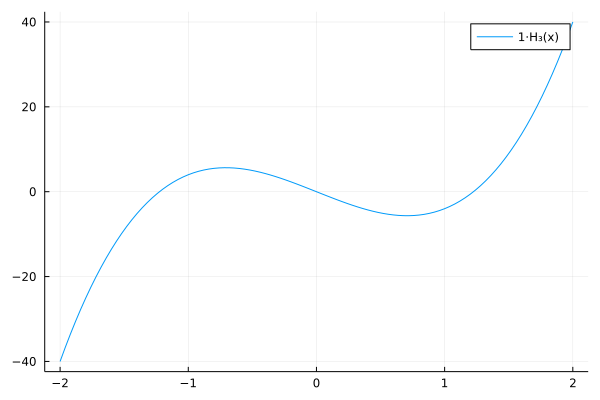

In [4]:
h3 = Hermite([0, 0, 0, 1])
plot(h3, -2, 2)

Żeby nie podawać wektora ze współczynnikami kolejnych stopni, można zrobić inaczej

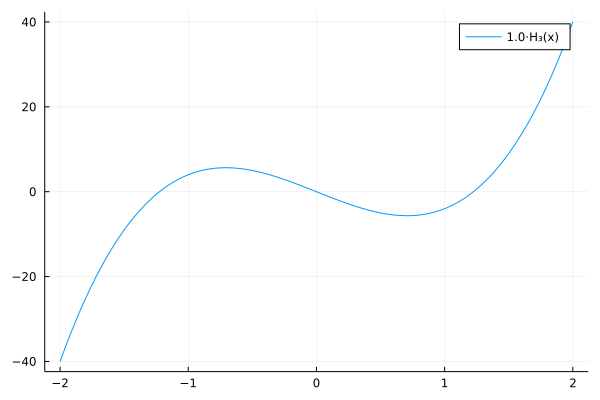

In [44]:
h1 = basis(Hermite, 0)
h2 = basis(Hermite, 1)
h3 = basis(Hermite, 2)
h4 = basis(Hermite, 3)
h5 = basis(Hermite, 4)
plot(h4, -2, 2)

### Przykład aproksymacji

Spróbujemy dokonać aproksymacji zaszumionej funkcji `cos` wykorzystując rodzinę wielomianów ortogonalnych Hermite'a.

In [6]:
# Definicja węzłów
xx = -5:.1:5
yy = cos.(xx/3 .+.2).^2 .+ rand(length(xx))/5;

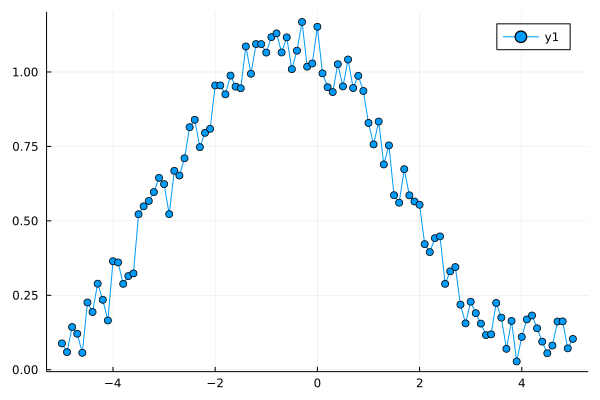

In [7]:
plot(xx, yy, markershape=:circle)

Obliczony wektor wartości normalizujemy do 1, żeby łatwiej policzyć współczynniki aproksymacji (niżej objaśnienie dlaczego łatwiej). 

In [8]:
#przykład prostego wektora, który znormalizujemy
vec=[2,2,2,2]

4-element Vector{Int64}:
 2
 2
 2
 2

In [9]:
# iloczyn skalarny = długość^2
dot(vec,vec)

16

In [10]:
# normalizacja - długość wektora =1
normalize(vec)

4-element Vector{Float64}:
 0.5
 0.5
 0.5
 0.5

In [11]:
# sprawdzamy długość^2
dot(normalize(vec), normalize(vec))

1.0

* 0bliczamy funkcję bazową uwzględniającą czynnik wagowy.
$<P_m,P_n>=\int_{-\infty}^{\infty} H_n(x)H_m(x)\exp(-x^2)dx 
= \int_{-\infty}^{\infty}\underbrace{H_n(x)\exp(-\frac{x^2}{2})}_{\text{funkcja bazowa}_n}\underbrace{H_m(x)\exp(-\frac{x^2}{2})}_{\text{funkcja bazowa}_m}$

* Wyliczamy jej wartości dla podanych punktów x
* Otrzymany wektor wartości normalizujemy


In [12]:
# obliczamy funkcję bazową
# argument 'norm'  na potrzeby wykresów
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

In [13]:
y_2_unnorm = base_fun(2, xx, false);
y_2_norm = base_fun(2, xx);

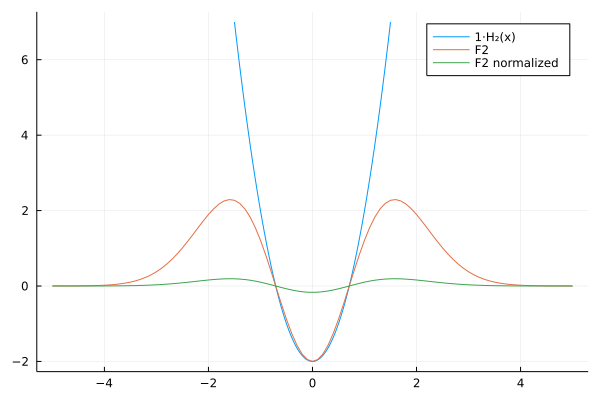

In [14]:
plot(Hermite([0, 0, 1]), -1.5, 1.5)
plot!(xx, y_2_unnorm, label="F2")
plot!(xx, y_2_norm, label="F2 normalized")

Obliczamy wektory wartosci dla punktów w xx dla kilku kolejnych funkcji bazowych

In [15]:
f0 = base_fun(0, xx, true);
f1 = base_fun(1, xx, true);
f2 = base_fun(2, xx, true);
f3 = base_fun(3, xx, true);

Sprawdźmy czy baza jest ortonormalna (uwaga: zamiast liczyć całkę, sprawdzamy po prostu iloczyn skalarny wektorów wartości)

In [16]:
dot_base = Array{Float64, 2}(undef, 4, 4); 

for (i, f_i) in enumerate([f0, f1, f2, f3]) 
    for (j, f_j) in enumerate([f0, f1, f2, f3])
        dot_base[i,j] = dot(f_i, f_j)
    end
end

In [17]:
dot_base

4×4 Matrix{Float64}:
  1.0           5.70888e-18  -3.25356e-11   5.32557e-18
  5.70888e-18   1.0           8.46587e-18  -9.61163e-10
 -3.25356e-11   8.46587e-18   1.0          -7.22228e-18
  5.32557e-18  -9.61163e-10  -7.22228e-18   1.0

OK, baza jest ortonormalna

Obliczamy kolejne współczynniki aproksymacji. Dzięki ortonormalnej bazie, poszczególne współczynniki są iloczynami skalarnymi wektora wartości funkcji aproksymowanej oraz  wektora bazowego (analogia: rzut  wektora wartości funkcji aproksymowanej w kierunku wektora bazowego).

Wektor bazowy jest znormalizowany $|\vec{j}|=1$, co upraszcza obliczenia.

Analogia w 2D

$\text{rzut }\vec{a} \text{ w kierunku }  \vec{j} =|\vec{a}|\cdot cos(\angle(\vec{a},\vec{j}))=|\vec{a}|\cdot|\vec{j}|\cdot cos(\angle(\vec{a},\vec{j}))=dot(\vec{a},\vec{j})$

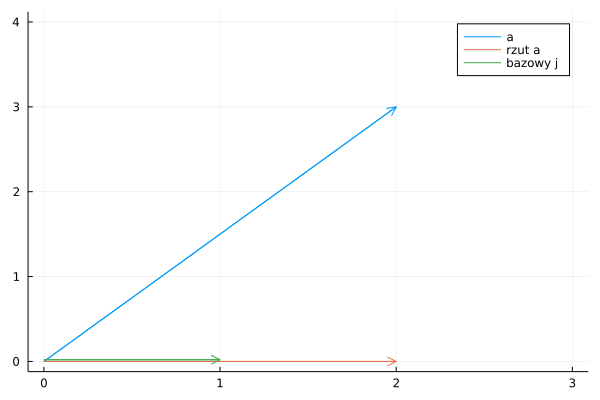

In [18]:
plot([0,2],[0,3],xrange=[0,3], yrange=[0,4],arrow=true, label="a")
plot!([0,2],[0,0],xrange=[0,3], yrange=[0,4],arrow=true, label="rzut a")
plot!([0,1],[0.02,0.02],xrange=[0,3], yrange=[0,4],arrow=true, label="bazowy j")

In [19]:
c0 = dot(yy, f0)
c1 = dot(yy, f1)
c2 = dot(yy, f2)
c3 = dot(yy, f3)
c0, c1, c2, c3

(5.746181769317643, -0.8609724893039713, 2.681347561535393, -0.8208722005103946)

Liczymy wartości aproksymowane kolejnymi stopniami

In [20]:
y_app_0 = c0*f0;
y_app_1 = c1*f1;
y_app_2 = c2*f2;
y_app_3 = c3*f3;

In [21]:
y_app_01 = y_app_0 + y_app_1;
y_app_012 = y_app_01 + y_app_2;
y_app_0123 = y_app_012 + y_app_3;

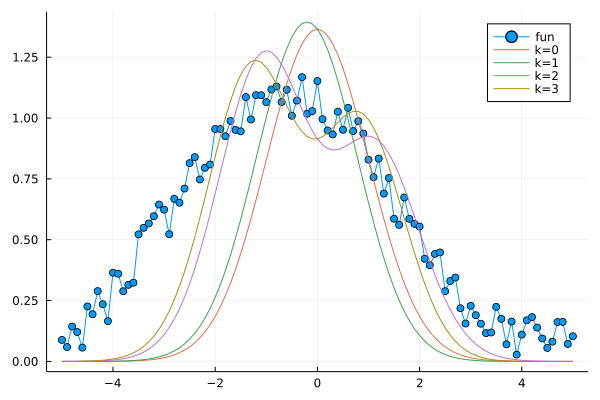

In [22]:
plot(xx, yy, markershape=:circle, label="fun")
plot!(xx, y_app_0, label="k=0")
plot!(xx, y_app_01, label="k=1")
plot!(xx, y_app_012, label="k=2")
plot!(xx, y_app_0123, label="k=3")

Liczymy błędy aproksymacji kolejnymi stopniami

In [23]:
using Statistics

In [24]:
mse(y1, y2) = mean((y1-y2).^2)

mse (generic function with 1 method)

In [25]:
mse(yy, y_app_0)

0.1280796846922013

In [26]:
mse(yy, y_app_01)

0.12074034184726788

In [27]:
mse(yy, y_app_012)

0.049555938414056144

In [28]:
mse(yy, y_app_0123)

0.04288434266228013

### EKG

Dane pochodzą z bazy https://www.physionet.org/content/mitdb/1.0.0/ .

W sygnale można wyróżnić wiele struktur, z których najbardziej charakterystyczną jest zespół QRS.

In [29]:
ekg_data = CSV.read("ecg_data.csv", DataFrame);

In [30]:
first(ekg_data, 5)

,time,signalN,signalV
,Float64,Float64,Float64
1,-0.1,0.0183886,-0.0990972
2,-0.0972222,0.0145191,-0.0920442
3,-0.0944444,0.012849,-0.0831644
4,-0.0916667,0.0124946,-0.0722728
5,-0.0888889,0.0124117,-0.0593656


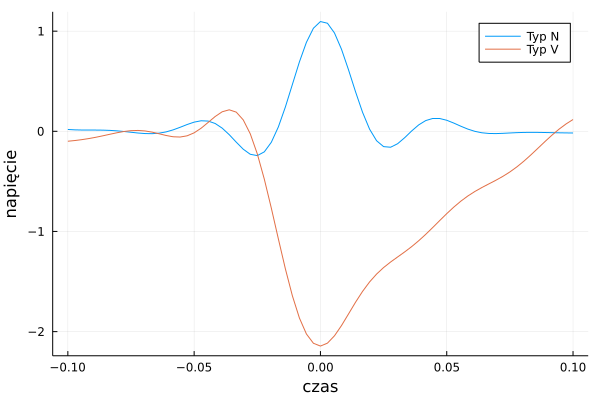

In [31]:
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

(5.725113911598116, -0.9157906158817669, 2.711325477169205, -0.8018390195854078)

Uwaga: Funkcje bazowe mają pewną "szerokość" i najlepiej aproksymują inne funkcje o podobnej szerokości. Można dodatkowo sparametryzować f. bazowe aby były węższe i lepiej pasowały do zespołów QRS. Na potrzeby laboratorium postąpimy inaczej - przeskalujemy oś X aproksymowanych sygnałów.

In [32]:
# Definicja węzłów
# xx_ekg = ekg_data.time*40;
# yy_ekgV = ekg_data.signalV;

## Zadania

#### Zadanie 1 (1 pkt)

Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

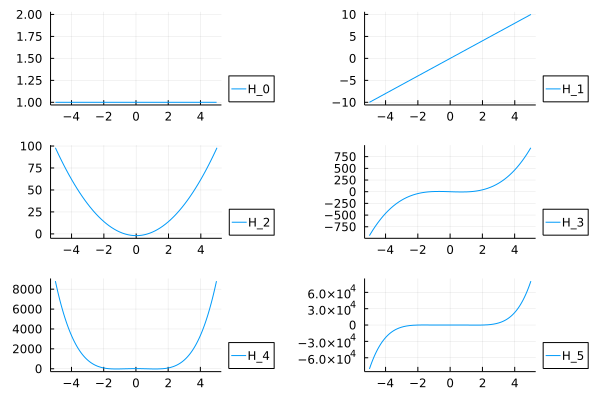

In [33]:
titles = ["H_0" "H_1" "H_2" "H_3" "H_4" "H_5"]
h_plots = [x -> basis(Hermite, i)(x) for i in 0:5]
plot(h_plots, layout=(3,2), label=titles, legend=:outerbottomright)

#### Zadanie 2  (1 pkt)

Narysować 6 pierwszych funkcji aproksymujących

In [34]:
xx = -5:0.1:5

-5.0:0.1:5.0

In [35]:
# obliczamy funkcję bazową
# argument 'norm'  na potrzeby wykresów
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

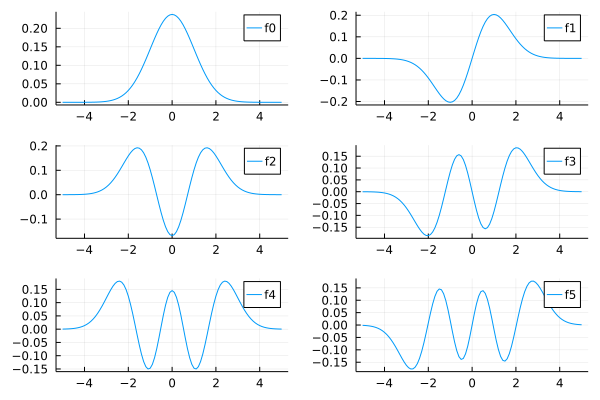

In [36]:
titles = ["f0" "f1" "f2" "f3" "f4" "f5"]
functions = [base_fun(i, xx) for i in 0:5]
# The collect() is an inbuilt function in julia which is used to return an array of all items in the specified collection or iterator.
arguments = [collect(xx) for _ in 0:5]
plot_2 = plot(arguments, functions, layout=(3, 2), labels=titles)

#### Zadanie 3  (1 pkt)

Pokazać, że same wielomiany nie są ortogonane, ale już z funkcją wagową $exp(-x^2)$ są. Uzyć metody z wektorami wartości, założyć pewien przedział.

In [41]:
xx = -5:0.1:5
fun = [base_fun(i, xx) for i ∈ 0:5-1]
xx

-5.0:0.1:5.0

In [45]:
base1 = Array{Float64, 2}(undef, 5, 5); 

for (i, h_i) in enumerate([h1, h2, h3, h4, h5]) 
    for (j, h_j) in enumerate([h1, h2, h3, h4, h5])
        base1[i,j] = dot(normalize(h_i.(xx)),normalize(h_j.(xx)))
    end
end

base1

5×5 Matrix{Float64}:
  1.0          -8.13712e-19   0.724931      7.36788e-18   0.570438
 -8.13712e-19   1.0           1.01559e-17   0.900225     -5.49862e-17
  0.724931      1.01559e-17   1.0          -3.75566e-17   0.948299
  7.36788e-18   0.900225     -3.75566e-17   1.0           5.6505e-17
  0.570438     -5.49862e-17   0.948299      5.6505e-17    1.0

In [39]:
base2 = Array{Float64, 2}(undef, 5, 5); 

for (i, f_i) in enumerate(fun) 
    for (j, f_j) in enumerate(fun)
        base2[i,j] = dot(f_i, f_j)
    end
end

base2

5×5 Matrix{Float64}:
  1.0           5.70888e-18  -3.25356e-11   5.32557e-18  -4.52405e-10
  5.70888e-18   1.0           8.46587e-18  -9.61163e-10  -1.2456e-19
 -3.25356e-11   8.46587e-18   1.0          -7.22228e-18  -1.67261e-8
  5.32557e-18  -9.61163e-10  -7.22228e-18   1.0          -2.57263e-18
 -4.52405e-10  -1.2456e-19   -1.67261e-8   -2.57263e-18   1.0

W pierwszym przypadku możemy zaobserwować, że iloczyny niektórych wielomianów wynoszą dużo ponad 0. Sprawia to, że nie możemy uznać ich za ortogonalne. Dla drugiej macierzy wartości iloczynów prezentują wartości bliskie 0 (jest to konsekwencją błędów numerycznych). Można jednak bezpiecznie przyjąć, że po uwzględnieniu funkcji wagowej wielomiany są ortogonalne.

#### Zadanie 4  (1 pkt)

Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V.

In [113]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)

xx_ekg = ekg_data.time * 40;
yy_ekgV = ekg_data.signalV;
yy_ekgN = ekg_data.signalN;

f0 = base_fun(0, xx_ekg,true);
f1 = base_fun(1, xx_ekg,true);
f2 = base_fun(2, xx_ekg,true);
f3 = base_fun(3, xx_ekg,true);
f4 = base_fun(4, xx_ekg,true);
f5 = base_fun(5, xx_ekg,true);
f6 = base_fun(6, xx_ekg,true);
f7 = base_fun(7, xx_ekg,true);
f8 = base_fun(8, xx_ekg,true);
f9 = base_fun(9, xx_ekg,true);
f10 = base_fun(10, xx_ekg,true);

**Sygnał N:**

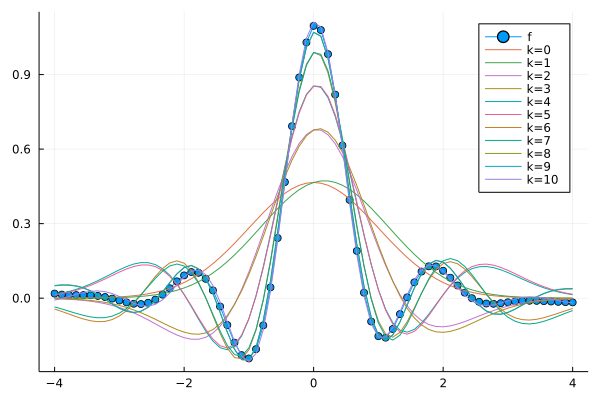

In [114]:
c0 = dot(yy_ekgN, f0)
c1 = dot(yy_ekgN, f1)
c2 = dot(yy_ekgN, f2)
c3 = dot(yy_ekgN, f3)
c4 = dot(yy_ekgN, f4)
c5 = dot(yy_ekgN, f5)
c6 = dot(yy_ekgN, f6)
c7 = dot(yy_ekgN, f7)
c8 = dot(yy_ekgN, f8)
c9 = dot(yy_ekgN, f9)
c10 = dot(yy_ekgN, f10)

y_app_0 = c0*f0;
y_app_1 = c1*f1;
y_app_2 = c2*f2;
y_app_3 = c3*f3;
y_app_4 = c4*f4;
y_app_5 = c5*f5;
y_app_6 = c6*f6;
y_app_7 = c7*f7;
y_app_8 = c8*f8;
y_app_9 = c9*f9;
y_app_10 = c10*f10;

y_app_01 = y_app_0 + y_app_1;
y_app_012 = y_app_01 + y_app_2;
y_app_0123 = y_app_012 + y_app_3;
y_app_01234 = y_app_0123 + y_app_4;
y_app_012345 = y_app_01234 + y_app_5;
y_app_0123456 = y_app_012345 + y_app_6;
y_app_01234567 = y_app_0123456 + y_app_7;
y_app_012345678 = y_app_01234567 + y_app_8;
y_app_0123456789 = y_app_012345678 + y_app_9;
y_app_012345678910 = y_app_0123456789 + y_app_10;

err_signal_n = Array{Float64}(undef, 11); 

for (i, y_i) in enumerate([y_app_0, y_app_01, y_app_012, y_app_0123, y_app_01234,
            y_app_012345, y_app_0123456, y_app_01234567, y_app_012345678, y_app_0123456789, y_app_012345678910]) 
    err_signal_n[i] = mse(yy_ekgN, y_i)
end

plot(xx_ekg, yy_ekgN, markershape=:circle, label="f")
plot0=plot!(xx_ekg, y_app_0, label="k=0")
plot1=plot!(xx_ekg, y_app_01, label="k=1")
plot2=plot!(xx_ekg, y_app_012, label="k=2")
plot3=plot!(xx_ekg, y_app_0123, label="k=3")
plot4=plot!(xx_ekg, y_app_01234, label="k=4")
plot5=plot!(xx_ekg, y_app_012345, label="k=5")
plot6=plot!(xx_ekg, y_app_0123456, label="k=6")
plot7=plot!(xx_ekg, y_app_01234567, label="k=7")
plot8=plot!(xx_ekg, y_app_012345678, label="k=8")
plot9=plot!(xx_ekg, y_app_0123456789, label="k=9")
plot10=plot!(xx_ekg, y_app_012345678910, label="k=10")

**Sygnał V:**

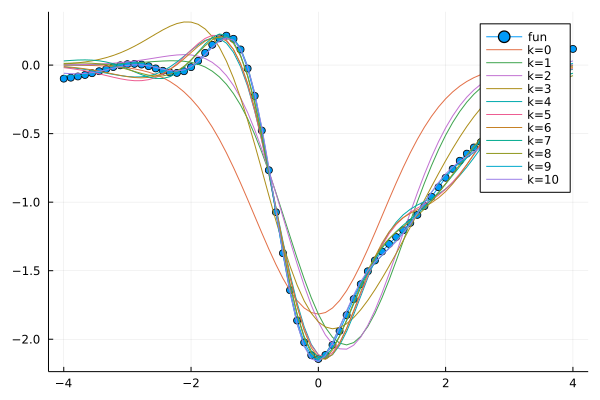

In [115]:
c0 = dot(yy_ekgV, f0)
c1 = dot(yy_ekgV, f1)
c2 = dot(yy_ekgV, f2)
c3 = dot(yy_ekgV, f3)
c4 = dot(yy_ekgV, f4)
c5 = dot(yy_ekgV, f5)
c6 = dot(yy_ekgV, f6)
c7 = dot(yy_ekgV, f7)
c8 = dot(yy_ekgV, f8)
c9 = dot(yy_ekgV, f9)
c10 = dot(yy_ekgV, f10)

y_app_0 = c0*f0;
y_app_1 = c1*f1;
y_app_2 = c2*f2;
y_app_3 = c3*f3;
y_app_4 = c4*f4;
y_app_5 = c5*f5;
y_app_6 = c6*f6;
y_app_7 = c7*f7;
y_app_8 = c8*f8;
y_app_9 = c9*f9;
y_app_10 = c10*f10;

y_app_01 = y_app_0 + y_app_1;
y_app_012 = y_app_01 + y_app_2;
y_app_0123 = y_app_012 + y_app_3;
y_app_01234 = y_app_0123 + y_app_4;
y_app_012345 = y_app_01234 + y_app_5;
y_app_0123456 = y_app_012345 + y_app_6;
y_app_01234567 = y_app_0123456 + y_app_7;
y_app_012345678 = y_app_01234567 + y_app_8;
y_app_0123456789 = y_app_012345678 + y_app_9;
y_app_012345678910 = y_app_0123456789 + y_app_10;

err_signal_v = Array{Float64}(undef, 11); 

for (i, y_i) in enumerate([y_app_0, y_app_01, y_app_012, y_app_0123, y_app_01234, y_app_012345,
            y_app_0123456, y_app_01234567, y_app_012345678, y_app_0123456789, y_app_012345678910]) 
    err_signal_v[i] = mse(yy_ekgV, y_i)
end

plot(xx_ekg, yy_ekgV, markershape=:circle, label="fun")
plot0=plot!(xx_ekg, y_app_0, label="k=0")
plot1=plot!(xx_ekg, y_app_01, label="k=1")
plot2=plot!(xx_ekg, y_app_012, label="k=2")
plot3=plot!(xx_ekg, y_app_0123, label="k=3")
plot4=plot!(xx_ekg, y_app_01234, label="k=4")
plot5=plot!(xx_ekg, y_app_012345, label="k=5")
plot6=plot!(xx_ekg, y_app_0123456, label="k=6")
plot7=plot!(xx_ekg, y_app_01234567, label="k=7")
plot8=plot!(xx_ekg, y_app_012345678, label="k=8")
plot9=plot!(xx_ekg, y_app_0123456789, label="k=9")
plot10=plot!(xx_ekg, y_app_012345678910, label="k=10")

#### Zadanie 5  (1 pkt)

Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

**Mean squared error (signal N):**

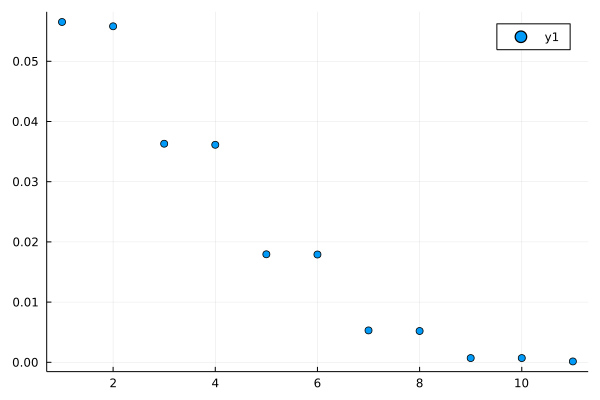

In [116]:
scatter(err_signal_n)

**Mean squared error (signal V):**

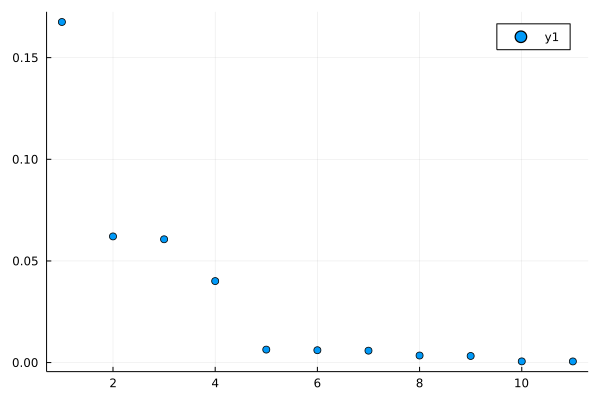

In [117]:
scatter(err_signal_v)